# <b> Only problem 1 and 6 will be graded. </b>

## Problem 1 : Integer program


Solve the following program by using linprog function and branch and bound method:
$$Objective : max(3x + 4y) $$
\begin{equation*}
s.t.
\begin{split}
  x + 2y & \leq 7 \\
  3x  - y & \geq 0 \\
  x -  y & \leq  2 \\
  x, y  \in Z^+ \cup \{0\} \\
\end{split}
\end{equation*}




In [ ]:
import numpy as np
from scipy.optimize import linprog
objective = np.array([-3,-4,0,0,0])
A = np.array([
    [1,2,1,0,0],
    [3,-1,0,-1,0],
    [1,-1,0,0,1]
])
b = np.array([7,0,2])
bounds = [(0,None),(0,None),(0,None),(0,None),(0,None)]
result = linprog(objective, A_eq=A, b_eq=b, bounds=bounds , method='simplex')
print("IS the solution:", result.success,"Optimize be: ", result.fun, " X:", result.x[0], " Y:", result.x[1])
# จากคำตอบจะเห็นว่า x,y ยังเป็นจำนวนจริงใช้ branch and bound ต่อ
# โดยการแบ่งช่วงเป็น x <=3 กับ x>=4

# เลือกช่วง x>=4
objective = np.array([-3,-4])
# เพื่อความง่ายจะแปลง >= เป็น <= เพื่อให้มี upper bound
A_ub = np.array([
    [1,2],
    [-3,1],
    [1,-1],
    # แปลง x>=4 เป็น -x <=-4
    [-1,0]
])
b_ub = np.array([7,0,2,-4])
bounds = [(0,None),(0,None)]
result = linprog(objective, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')
print("IS the solution:", result.success,"Optimize be: ", result.fun, " X:", result.x[0], " Y:", result.x[1])

# เลือกช่วง x<= 3
A_ub = np.array([
    [1,2],
    [-3,1],
    [1,-1],
    [1,0]
])
b_ub = np.array([7,0,2,3])
result = linprog(objective, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')
print("IS the solution:", result.success,"Optimize be: ", result.fun, " X:", result.x[0], " Y:", result.x[1])
print("คำตอบคือ Optimize: ",result.fun, " X:", result.x[0], " Y:", result.x[1])
# ประมาณ 1.9999999999999996 เป็น 2

IS the solution: True Optimize be:  -17.666666666666668  X: 3.6666666666666665  Y: 1.6666666666666667
IS the solution: False Optimize be:  -18.0  X: 4.0  Y: 1.5
IS the solution: True Optimize be:  -17.0  X: 3.0  Y: 1.9999999999999996
คำตอบคือ Optimize:  -17.0  X: 3.0  Y: 1.9999999999999996


/tmp/ipython-input-869955172.py:11: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective, A_eq=A, b_eq=b, bounds=bounds , method='simplex')
/tmp/ipython-input-869955172.py:28: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')
/tmp/ipython-input-869955172.py:39: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(objective, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')


# For problem 2-6: you can use Excel to find the answer.

## Problem 2 : Bin packing problem

Solve problem 6 in Assignment 1, with only integer solutions allowed.

In [40]:
from scipy.optimize import linprog
import numpy as np
import math
objective = np.array([1 for i in range(14)])
'''
มองเป็น
xi คือการ config server ตาม type ของ vm ให้พอ 8 core
x1 = 4s
x2 = 3s,
x3 = 2s
x4 = 1s
x5 = 2m,
x6 = 1m
x7 = 2l
x8 = 1l
x9 = 2s 1m
x10 = 2s 1l
x11 = 1s 2m
x12 = 1s 1l
x13 = 1m + 1l
x14 = 1s 1m
'''
A = [
    [4,3,2,1,0,0,0,0,2,2,1,1,0,1],
    [0,0,0,0,2,1,0,0,1,0,2,0,0,1],
    [0,0,0,0,0,0,2,1,0,1,0,1,1,0]
]

b = [20,9,5]
bound = np.array([[0, None] for i in range(14)])
# result = linprog(c=objective, A_eq=A, b_eq=b, bounds=bound, method='simplex')
# print(result)

best_solution = None
best_objective_value = np.inf

def generate_sol(A_ub, b_ub):
  global best_solution, best_objective_value
  A_ub_np = np.array(A_ub) if A_ub else None
  b_ub_np = np.array(b_ub) if b_ub else None
  result = linprog(c=objective, A_eq=A, b_eq=b, A_ub=A_ub_np, b_ub=b_ub_np, bounds=bound, method='simplex')
  if not result.success or result.fun >= best_objective_value:
    return
  is_integer_solution = np.all(np.abs(result.x - np.round(result.x)) < 1e-6)
  if is_integer_solution:
    if result.fun < best_objective_value:
      best_solution = result.x
      best_objective_value = result.fun
    return
  for i in range(14):
    if abs(result.x[i] - round(result.x[i])) >= 1e-6:
      branching_value = result.x[i]
      A_ub1 = A_ub.copy()
      b_ub1 = b_ub.copy()
      A_ub1.append([0 for k in range(14)])
      A_ub1[-1][i] = 1
      b_ub1.append(math.floor(branching_value))
      generate_sol(A_ub1, b_ub1)
      A_ub2 = A_ub.copy()
      b_ub2 = b_ub.copy()
      A_ub2.append([0 for k in range(14)])
      A_ub2[-1][i] = -1
      b_ub2.append(-math.ceil(branching_value))
      generate_sol(A_ub2, b_ub2)
      break
generate_sol([],[])
print(best_objective_value, best_solution)

11.0 [1. 0. 0. 0. 0. 0. 0. 0. 1. 5. 4. 0. 0. 0.]


/tmp/ipython-input-832146156.py:41: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c=objective, A_eq=A, b_eq=b, A_ub=A_ub_np, b_ub=b_ub_np, bounds=bound, method='simplex')


## Problem 3 : Knapsack problem

An evil thief has broken into someone's house, looking for stealing some valuables. After successfully lockpicking the safe, he now accesses six valuable things, which are shown in the table below. Unfortunately, the bag he used for carrying the stolen goods could only store 20 kg. Which item should he steal to maximize the value of the stolen goods? Formulate the problem as an integer program and solve for an optimal solution.


|  Item | weight (kg) |  value(THB) |
|:-:|:-:|:-:|
| Magnificent statuette | 10 | 500,000 |
| Golden watch | 2 | 50,000 |
| Rare coin| 0.01 | 1000 |
| Pearl necklace| 7 | 300,000 |
| Diamond| 12 | 800,000 |
| Painting| 8 | 320,000 |




In [89]:
from scipy.optimize import milp, LinearConstraint, Bounds
import numpy as np

objective = np.array([-500000,-50000,-1000,-300000,-800000,-320000])
A = np.array([
    [10,2,0.01,7,12,8]
])
lower_bound = np.full(len(A),-np.inf)
upper_bound = np.zeros(len(A))
upper_bound[0] = 20
constraint = LinearConstraint(A,lb=lower_bound,ub=upper_bound)
lb = np.array([0,0,0,0,0,0])
ub = np.array([1,1,1,1,1,1])
bound = Bounds(lb=lb,ub=ub)
integrality = np.array([1,1,1,1,1,1])
result = milp(c=objective, integrality=integrality, bounds=bound, constraints=constraint)
print(result)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -1120000.0
              x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e+00
                   1.000e+00]
 mip_node_count: 1
 mip_dual_bound: -1120000.0
        mip_gap: 0.0


## Problem 4.1:  Hamtaro empire (Set cover problem)

After the first crisis (see 2020 Quiz 1 problem 8 for more details) was averted , Hamtaro now starts planning to distribute his product to the neighboring towns in the region. In this region, there are 9 towns located at the position (x, y). The factories could be planted in any town, but the goods could only be delivered within 50 km from the planted location. To avoid repeating the same mistake, Hamtaro determines that the planted factory covers every town in the entire region. To minimized the number of planted factory, which town should he establish his factory? Formulate the problem as a linear program and solve for an optimal solution. Please also visualize the solution you have obtained in the cells below.

**Note: The distance metric used in problem 4.1 and 4.2 is euclidean distance.**

**Note: The $i^{th}$ index of the array refers to the $i^{th}$ factory (the index start with 0).**

In [1]:
import numpy as np # you could use pandas to convert the array into csv
town_location = np.array([[  57.1817396 , -100.21311863],
       [  27.20599853,  -83.10295469],
       [-151.77984602, -204.29167019],
       [  45.64179719,   46.87585513],
       [-169.69698481, -110.76447501],
       [  87.25935223,  -91.63706912],
       [ 144.11419822,  200.79810504],
       [ -63.81741004,   43.32842009],
       [  92.65947426,  -10.32326513],
      ])

In [2]:
import math as mh
check = []
for i in range(len(town_location)):
  add = np.zeros(len(town_location))
  for j in range(len(town_location)):
    distance = mh.sqrt((town_location[i][0] - town_location[j][0])**2 + (town_location[i][1] - town_location[j][1])**2)
    if (distance <= 50):
      add[j] = 1
  check.append(add)
print(check)

[array([1., 1., 0., 0., 0., 1., 0., 0., 0.]), array([1., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1.])]


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 7.0
              x: [ 1.000e+00  0.000e+00  1.000e+00  1.000e+00  1.000e+00
                   0.000e+00  1.000e+00  1.000e+00  1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 7.0
        mip_gap: 0.0


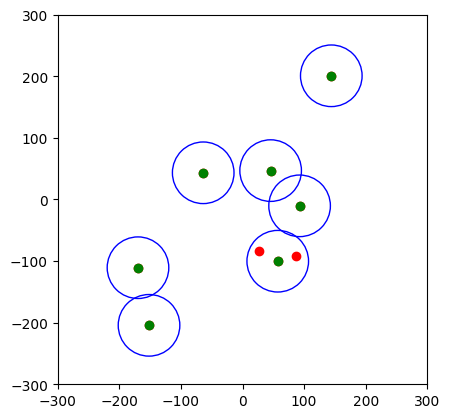

In [4]:
from scipy.optimize import milp, LinearConstraint, Bounds
import numpy as np
def visualize_factory_coverage(town_location, factory_idx):
  '''
  visualize the factory and town locations.
  Input:
    town_location : location of town in (x, y) coordinate
    factory_idx : the id of towns chosen to plant a factory
  Output:
    visual output displaying town (red), factory (green) and factory's  delivery range(circle)
  '''
  factory_location = town_location[factory_idx]
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  plt.xlim(-300, 300)
  plt.ylim(-300, 300)
  plt.scatter(town_location[:,0], town_location[:,1], color = 'red')
  plt.scatter(factory_location[:,0], factory_location[:,1], color = 'green')
  ax.set_aspect(1)
  for x in factory_location:
    ax.add_artist(plt.Circle((x[0],x[1]), 50, fill=False, color = 'blue'))

  plt.show()
# visualize_factory_coverage(town_location, [0, 2, 3])
objective = np.array([1 for i in range(len(town_location))])
'''
constraint ก็คืออย่างน้่อยแต่ละเมืองต้องถูกคลุม
จะได้ ว่า

'''
A = []
for i in range(len(town_location)):
  add = [check[j][i] for j in range(len(town_location))]
  A.append(add)
lb = np.ones(len(town_location))
ub = np.full(len(town_location), np.inf)
constraint = LinearConstraint(A,lb=lb,ub=ub)
lower_bound = np.zeros(len(town_location))
upper_bound = np.ones(len(town_location))
bounds = Bounds(lower_bound,upper_bound)
intergral = np.ones(len(town_location))
outcome = milp(c=objective, constraints=constraint, bounds=bounds, integrality=intergral)
print(outcome)
factory_indices = np.where(outcome.x > 0.5)[0]
visualize_factory_coverage(town_location,factory_indices)

## Problem 4.2  (Optional) : Hamtaro empire part 2 (K-median clustering problem)

The solution obtained from problem 4.1 is unrealistic as Hamtaro has to plant too many factories. Thus, Hamtaro comes up with a new idea. He now instead only place a few factories and focuses more on goods transportation. After carefully reevaluating the new strategy, Hamtaro now only place 4 factories, but the goods delivery range is unlimited as he has outsourced an inland freight company, which charges 500 THB/km per distance they have travel. The cost is calculated only from the distance from the factory to the towns. To minimize the goods delivery cost, which town should he set up the factories? Formulate the problem as a linear program and solve for an optimal solution.

**Note: This problem is the hardest problem in this assignment. You could search the keyword 'K-median clustering'  for guidance.**

In [ ]:
pass

## Problem 5: Quantile Regression (piecewise linear function)

If you observe the objective function from the problem 6 in the previous lab, the solution that minimizes $l_2$ regression (least square method) and $l_1$ regression is the mean and median of the dataset respectively.  Quantile regression is a generalized formed of $l_1$ regression you have solved in the previous question. Likewise, The solution of quantile regression is the $q^{th}$ quantile of the dataset. A mathematical program for quantile regression is:

####Decision variable $\beta_1, \beta_0$

$$Objective : min( \sum_{i=1}^{N}L_q(y_i - (\beta_1x_i + \beta_0))) $$
\begin{equation*}
s.t.
\begin{split}
  \beta_1, \beta_0 \in R
\end{split}
\end{equation*}

where
\begin{equation*}
\begin{split}
  L_q(x) = \left\{
                \begin{array}{ll}
                  (q-1)x, & x \leq 0\\
                  qx, & x > 0\\
                \end{array}
              \right.
\end{split}
\end{equation*}

Thus, a $l_1$ regression is equivalent to a quantile regression where q = 0.5.

Find $\beta_1, \beta_0$ using quantile regression at q = 0.25, 0.75 by reformulating the problem as a linear program, and compare the result with the one in the previous lab. What can you say about the result?



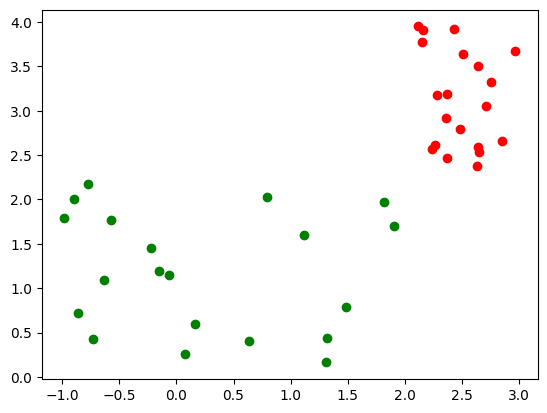

Optimal Solution Found!
beta0 = 2.0756
beta1 = 0.5384


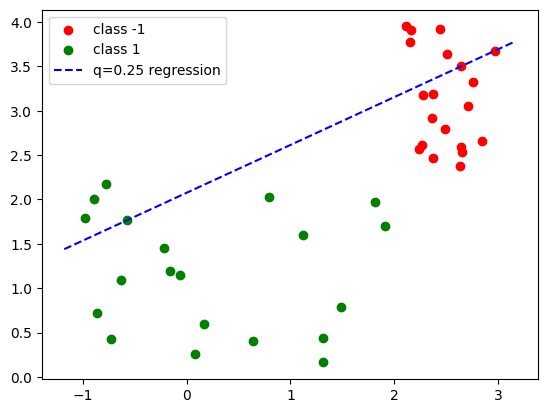

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import milp, LinearConstraint, Bounds
np.random.seed(42)
class_a = np.array([[np.random.uniform(2.1, 3), np.random.uniform(2.3, 4)] for _ in range(20)]) # class -1 data
class_b = np.array([[np.random.uniform(-1, 2), np.random.uniform(0, 2.2)] for _ in range(20)]) # class 1 data
plt.scatter(class_a[:, 0], class_a[:, 1], color = 'red', label = 'class -1')
plt.scatter(class_b[:, 0], class_b[:, 1], color = 'green', label = 'class 1')

plt.show()
'''
use piece wise linear

Lq  = z1(q-1)*b1 + z2(q-1)*0 + z3(q)b3
กำหนดให้
b1 = -10,
b2 = 0
b3 = 10
เพราะ point มี x ไม่เกิน 10 กับ -10
z1 <= a1,
z2 <= a1 + a2,
z3 <= a2
a1 + a2 = 1,
yi = {0,1}
zi >= 0, z1 + z2 + z3 = 1
มอง input เป็น yi - b1xi - b0 จะได้ว่า
xinput = z1b1  + z2b2 + z3b3 = z1b1 + z3b3
z1b1 + z3b3 = yi - b1xi - b0
-10z1 + 10z3 = yi- b1xi - b0
objective จะเป็น Lq
'''
all_points = np.vstack([class_a, class_b])
N = len(all_points)

q = 0.25
b1, b2, b3 = -10, 0, 10
f_b1 = (q - 1) * b1
f_b3 = q * b3

num_vars = 2 + N * 6
objective = np.zeros(num_vars)
objective[2 : 2 + N] = 1.0

# --- 5. สร้าง Constraint Matrix และ Vectors ---
num_constraints = N * 7
A = np.zeros((num_constraints, num_vars))
# -- FIX: สร้าง lb และ ub ไปพร้อมกันเลย --
final_lower_bounds = np.zeros(num_constraints)
final_upper_bounds = np.zeros(num_constraints)

for i in range(N):
    xi, yi = all_points[i, 0], all_points[i, 1]
    row_offset = i * 7

    idx_beta0, idx_beta1 = 0, 1
    idx_u = 2 + i
    idx_z1, idx_z2, idx_z3 = 2 + N + i, 2 + N*2 + i, 2 + N*3 + i
    idx_a1, idx_a2 = 2 + N*4 + i, 2 + N*5 + i

    # Constraint 1: Equality (= yi)
    # -10z1 + 10z3 + x1b1 + b0  = yi
    A[row_offset + 0, idx_beta1] = xi
    A[row_offset + 0, idx_beta0] = 1
    A[row_offset + 0, idx_z1] = 10
    A[row_offset + 0, idx_z3] = -10
    final_lower_bounds[row_offset + 0] = yi
    final_upper_bounds[row_offset + 0] = yi

    # Constraint 2: Equality (= 0)
    # z1(q-1)b1  + z3(q)b3 = 0
    A[row_offset + 1, idx_u] = 1
    A[row_offset + 1, idx_z1] = -f_b1
    A[row_offset + 1, idx_z3] = -f_b3
    final_lower_bounds[row_offset + 1] = 0
    final_upper_bounds[row_offset + 1] = 0

    # Constraint 3: Equality (= 1)
    # z1+z2+z3 = 1
    A[row_offset + 2, idx_z1] = 1
    A[row_offset + 2, idx_z2] = 1
    A[row_offset + 2, idx_z3] = 1
    final_lower_bounds[row_offset + 2] = 1
    final_upper_bounds[row_offset + 2] = 1

    # Constraint 4: Equality (= 1)
    # a1 + a2 = 1
    A[row_offset + 3, idx_a1] = 1
    A[row_offset + 3, idx_a2] = 1
    final_lower_bounds[row_offset + 3] = 1
    final_upper_bounds[row_offset + 3] = 1

    # Constraint 5: Inequality (<= 0)
    # z1 - a1 <= 0
    A[row_offset + 4, idx_z1] = 1
    A[row_offset + 4, idx_a1] = -1
    final_lower_bounds[row_offset + 4] = -np.inf
    final_upper_bounds[row_offset + 4] = 0

    # Constraint 6: Inequality (<= 0)
    # z2 - a1 -a2 <= 0
    A[row_offset + 5, idx_z2] = 1
    A[row_offset + 5, idx_a1] = -1
    A[row_offset + 5, idx_a2] = -1
    final_lower_bounds[row_offset + 5] = -np.inf
    final_upper_bounds[row_offset + 5] = 0

    # Constraint 7: Inequality (<= 0)
    # z3 - a2 <= 0
    A[row_offset + 6, idx_z3] = 1
    A[row_offset + 6, idx_a2] = -1
    final_lower_bounds[row_offset + 6] = -np.inf
    final_upper_bounds[row_offset + 6] = 0

# สร้าง object constraint ด้วย lb, ub ที่สมบูรณ์แล้ว
constraint = LinearConstraint(A, lb=final_lower_bounds, ub=final_upper_bounds)

# (ส่วนที่ 6, 7, 8 เหมือนเดิม)
# ...
lower_bounds = np.full(num_vars, -np.inf)
upper_bounds = np.full(num_vars, np.inf)
integrality = np.zeros(num_vars)
lower_bounds[2 : 2 + N*6] = 0
# lower_bounds[2 + N*4 : 2 + N*6] = 0
upper_bounds[2 + N*4 : 2 + N*6] = 1
integrality[2 + N*4 : 2 + N*6] = 1 # a1 a2 ของแต่ละ จุดทำให้มี 80 จุด
bounds = Bounds(lower_bounds, upper_bounds)

result = milp(c=objective, constraints=constraint, bounds=bounds, integrality=integrality)

if result.success:
    beta0 = result.x[0]
    beta1 = result.x[1]
    print(f"Optimal Solution Found!")
    print(f"beta0 = {beta0:.4f}")
    print(f"beta1 = {beta1:.4f}")

    plt.scatter(class_a[:, 0], class_a[:, 1], color = 'red', label = 'class -1')
    plt.scatter(class_b[:, 0], class_b[:, 1], color = 'green', label = 'class 1')
    x_vals = np.array(plt.xlim())
    y_vals = beta1 * x_vals + beta0
    plt.plot(x_vals, y_vals, '--', color='blue', label=f'q={q} regression')
    plt.legend()
    plt.show()
else:
    print("Could not find an optimal solution.")
    print(f"Message: {result.message}")


# Problem 6 : Instraham


After several crises, Hamtaro is fed up with the manufacturing business and is now looking for new business opportunities. He finds out that opening social media platform could make a hefty sum of money. Moreover, since hamsters do not currently have a social media site, Hamtaro can monopolize the market easily. Therefore, he creates Instraham, the first social media website of hamsters, by hamsters, for hamsters.

After consulting with Koushi-kun, Hamtaro figures out that social network platforms often have the features shown in the table below. For each feature, the CPU load and storage load are shown with its associated business value score.

|Feature name| CPU load (%) | storage load (%) | business value score |
|:-:|:-:|:-:|:-:|
| A | 20 | 30| 10|
| B | 10 | 5| 5|
| C| 30 | 10| 10|
| D | 5 | 10| 3|
| F | 15 | 30| 10|
| G | 60 | 70| 30|
| H | 80 | 80| 80|
| I | 10 | 50| 20|
| J | 3 | 50| 5|

Feature A, and J is mandatory while the rest is optional. The objective is to maximize the business value score of the website while not overloading CPU and storage servers. His engineering friend, Taisho-kun, also suggests him that he could improve the website efficiency by performing the following operations:

- Feature compression. This method will reduce both CPU and storage load by half, but it also reduces the business value to 55% of the original value. Every feature could be compressed, but the number of compressed features in the website is limited to two.

-  The usage of storage efficient algorithm. By using this method, the feature storage load is reduced by half but it also doubles the CPU load. However, only feature H, I, J can use this method. This method could not be used concurrently with feature compression.

From this information, which features should Hamtaro develop? ~~Use Amdahl's law to find the best speedup~~. Formulate the problem as an integer program and solve for an optimal solution.

<b> Note : This problem is based on the blog (https://engineering.fb.com/2021/07/29/data-infrastructure/linear-programming/) </b>


In [5]:
# objective max(value score), Feature A and J have to hand, CPU and stroage have to hadn't overloading,
'''
- compression will reudct cpu and storage load by half but reduct business value to 55% of current value ทุก featrue บีบอัดได้แต่ limit แค่สองครั้ง
- algorithm reduct storage load to half but double cpu load แต่ H I j เทานั้นที่ใช้ได้ ไม่สามารถใช้ compress กับ algorithm พร้อมกันได้บน feature เดียวกัน
'''
import numpy as np
from scipy.optimize import linprog, milp, LinearConstraint, Bounds
# A,B,C,D,F,G,H,I,J,z,s, a', b',c',d',f',g',h',i',j', h1,i1,j1,
objective = np.array([-10, -5, -10, -3, -10, -30, -80, -20, -5, 0, 0, 4.5, 2.25, 4.5, 1.35, 4.5, 13.5, 36, 9, 2.25, 0,0,0])
'''
ให้ a' , b' , c' จนถึง  j' คือการเลือกว่าจะ compression มั้ย
ให้ h1 , i1, j1, คือการเลือกว่าจะ ใช้ algorithm มั้ย
ให้ z คือ current cpu load
ให้ s คือ current storage load

constraint:
(20a - 10a') + (10b - 5b') + (30c - 15c') + (5d - 2.5d') + (15f - 7.5f') + (60g - 30g') + (80h - 40h' + 80h1) + (10i - 5i' + 10i1) + (3j - 1.5j' + 3j1) = z
(30a - 15a') + (5b - 2.5b') + (10c - 5c') + (10d - 5d') + (30f - 15f') + (70g - 35g') + (80h - 40h' - 40h1) + (50i - 25i' - 25i1) + (50j - 25j' - 25j1) = s
z <= 100
s <= 100
a' <= a
b' <= b
c' <= c
d' <= d
f' <= f
g' <= g
h' <= h
i' <= i
j' <= j
h1 <= h
i1 <= i
j1 <= j
h1 + h' <= 1
i1 + i' <= 1
j1 + j' <= 1
a = 1
j = 1
a' + b' + c' + d' + f' + g' + h' + i' + j' <= 2
ตัวแปรทุกตัวเป็น binary ยกเว้น z กับ s
'''
A_eq = np.array([
   [20,10,30,5,15,60,80,10,3,-1, 0,-10,-5,-15,-2.5,-7.5,-30,-40,-5,-1.5,80,10,3],
   [30,5,10,10,30,70,80,50,50,0,-1,-15,-2.5,-5,-5,-15,-35,-40,-25,-25,-40,-25,-25],
   [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
])
A_ub = np.array([
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1],
    # [0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    # [0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0],
])
b_eq = np.array([0,0,1,1])
b_ub = np.array([100,100,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2])
bound = np.array([[0, None] for i in range(len(objective))])
# result = linprog(objective, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bound, method='simplex')
# print(result.x)
# เปลี่ยนไปใช้ milp
A = np.vstack([A_eq, A_ub])
lb = np.full(len(A), -np.inf)
ub = np.ones(len(A))
lb[0:2] = ub[0:2]= 0
lb[2] = lb[3] = 1
ub[2] = ub[3] = 1
ub[4:6] = 100
ub[6:18] = 0
ub[18:21] = 1
ub[21] = 2
constraint = LinearConstraint(A, lb, ub)
integrality = np.array([1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1])
lower_bounds = [0]*9 + [0, 0] + [0]*9 + [0]*3
upper_bounds = [1]*9 + [100, 100] + [1]*9 + [1]*3
bound = Bounds(lower_bounds, upper_bounds)
result = milp(c=objective, constraints=constraint, bounds=bound, integrality=integrality)


if result.success:
    print(f"Maximum Business Value: {-result.fun:.2f}")
    x = result.x
    print("\n--- Chosen Features & Modifications ---")
    features = ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J']
    for i in range(len(features)):
        if x[i] == 1:
            feature_name = features[i]
            state = "Normal"
            if x[11 + i] == 1:
                state = "Compressed"
            elif feature_name == 'H' and x[20] == 1:
                state = "Storage-Efficient Algorithm"
            elif feature_name == 'I' and x[21] == 1:
                state = "Storage-Efficient Algorithm"
            elif feature_name == 'J' and x[22] == 1:
                state = "Storage-Efficient Algorithm"

            print(f"- Feature {feature_name}: Used ({state})")

    print(f"\nTotal CPU Load: {result.x[9]:.2f}%")
    print(f"Total Storage Load: {result.x[10]:.2f}%")

else:
    print("Could not find an optimal solution.")
    print(f"Message: {result.message}")

Maximum Business Value: 69.50

--- Chosen Features & Modifications ---
- Feature A: Used (Compressed)
- Feature B: Used (Normal)
- Feature C: Used (Normal)
- Feature H: Used (Compressed)
- Feature J: Used (Storage-Efficient Algorithm)

Total CPU Load: 96.00%
Total Storage Load: 95.00%
